# Twitter data

## Copyright and Licensing

You are free to use or adapt this notebook for any purpose you'd like. However, please respect the [Simplified BSD License](https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/LICENSE.txt) that governs its use.

# Twitter API Access

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://dev.twitter.com/apps and create a sample application.

Choose any name for your application, write a description and use `http://google.com` for the website.

Under **Key and Access Tokens**, there are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret (Click on Create Access Token to create those). Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

The first time you execute the notebook, add all credentials so that you can save them in the `pkl` file, then you can remove the secret keys from the notebook because they will just be loaded from the `pkl` file.

The `pkl` file contains sensitive information that can be used to take control of your twitter acccount, **do not share it**.

In [1]:
import pickle
import os

In [2]:
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = ''
    Twitter['Consumer Secret'] = ''
    Twitter['Access Token'] = ''
    Twitter['Access Token Secret'] = ''
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

Install the `twitter` package to interface with the Twitter API

In [3]:
!pip install twitter

## Example 1. Authorizing an application to access Twitter account data

In [4]:
import twitter

auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Example 2. Retrieving trends

In [5]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

# look at the BOSS placefinder here: https://developer.yahoo.com/boss/placefinder/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

Look for the WOEID for [san-diego](http://woeid.rosselliot.co.nz/lookup/san%20diego%20%20ca)

In [6]:
SAN_DIEGO_WOE_ID=2487889

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
san_diego_trends = twitter_api.trends.place(_id=SAN_DIEGO_WOE_ID)

In [7]:
world_trends

[{'as_of': '2017-04-28T01:06:33Z',
  'created_at': '2017-04-28T01:03:42Z',
  'locations': [{'name': 'Worldwide', 'woeid': 1}],
  'trends': [{'name': '#NFLDraft',
    'promoted_content': None,
    'query': '%23NFLDraft',
    'tweet_volume': 317173,
    'url': 'http://twitter.com/search?q=%23NFLDraft'},
   {'name': 'Jamal Adams',
    'promoted_content': None,
    'query': '%22Jamal+Adams%22',
    'tweet_volume': 28184,
    'url': 'http://twitter.com/search?q=%22Jamal+Adams%22'},
   {'name': 'Corey Davis',
    'promoted_content': None,
    'query': '%22Corey+Davis%22',
    'tweet_volume': 25752,
    'url': 'http://twitter.com/search?q=%22Corey+Davis%22'},
   {'name': '#Billboards2017',
    'promoted_content': None,
    'query': '%23Billboards2017',
    'tweet_volume': 46800,
    'url': 'http://twitter.com/search?q=%23Billboards2017'},
   {'name': 'Solomon Thomas',
    'promoted_content': None,
    'query': '%22Solomon+Thomas%22',
    'tweet_volume': 14942,
    'url': 'http://twitter.com/s

In [8]:
trends=san_diego_trends
print(type(trends))
print(list(trends[0].keys()))
print(trends[0]['trends'])

<class 'twitter.api.TwitterListResponse'>
['created_at', 'trends', 'locations', 'as_of']
[{'promoted_content': None, 'name': '#NFLDraft', 'query': '%23NFLDraft', 'tweet_volume': 317173, 'url': 'http://twitter.com/search?q=%23NFLDraft'}, {'promoted_content': None, 'name': 'Mike Williams', 'query': '%22Mike+Williams%22', 'tweet_volume': 16025, 'url': 'http://twitter.com/search?q=%22Mike+Williams%22'}, {'promoted_content': None, 'name': 'Jamal Adams', 'query': '%22Jamal+Adams%22', 'tweet_volume': 28184, 'url': 'http://twitter.com/search?q=%22Jamal+Adams%22'}, {'promoted_content': None, 'name': 'Corey Davis', 'query': '%22Corey+Davis%22', 'tweet_volume': 25752, 'url': 'http://twitter.com/search?q=%22Corey+Davis%22'}, {'promoted_content': None, 'name': '#takeyourchildtoworkday', 'query': '%23takeyourchildtoworkday', 'tweet_volume': 46873, 'url': 'http://twitter.com/search?q=%23takeyourchildtoworkday'}, {'promoted_content': None, 'name': 'Solomon Thomas', 'query': '%22Solomon+Thomas%22', 'tw

## Example 3. Displaying API responses as pretty-printed JSON

In [9]:
import json

print((json.dumps(us_trends, indent=1)))

[
 {
  "created_at": "2017-04-28T01:03:42Z",
  "trends": [
   {
    "promoted_content": null,
    "name": "#NFLDraft",
    "query": "%23NFLDraft",
    "tweet_volume": 317173,
    "url": "http://twitter.com/search?q=%23NFLDraft"
   },
   {
    "promoted_content": null,
    "name": "Jamal Adams",
    "query": "%22Jamal+Adams%22",
    "tweet_volume": 28184,
    "url": "http://twitter.com/search?q=%22Jamal+Adams%22"
   },
   {
    "promoted_content": null,
    "name": "Corey Davis",
    "query": "%22Corey+Davis%22",
    "tweet_volume": 25752,
    "url": "http://twitter.com/search?q=%22Corey+Davis%22"
   },
   {
    "promoted_content": null,
    "name": "Solomon Thomas",
    "query": "%22Solomon+Thomas%22",
    "tweet_volume": 14942,
    "url": "http://twitter.com/search?q=%22Solomon+Thomas%22"
   },
   {
    "promoted_content": null,
    "name": "Mike Williams",
    "query": "%22Mike+Williams%22",
    "tweet_volume": 16025,
    "url": "http://twitter.com/search?q=%22Mike+Williams%22"
   },

## Example 4. Computing the intersection of two sets of trends

In [10]:
trends_set = {}
trends_set['world'] = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

trends_set['us'] = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

trends_set['san diego'] = set([trend['name'] 
                     for trend in san_diego_trends[0]['trends']]) 

for loc in ['world','us','san diego']:
    print(('-'*10,loc))
    print((','.join(trends_set[loc])))

print(( '='*10,'intersection of world and us'))
print((trends_set['world'].intersection(trends_set['us'])))

print(('='*10,'intersection of us and san-diego'))
print((trends_set['san diego'].intersection(trends_set['us'])))

('----------', 'world')
Chris Sale,#MafiaSdvCiteUmaFrase,Jags,#BerkeleyProtest,Kirk Cousins,#حياتك76,#ConCincoPesitos,#RetoDeLaBallenaAzul,#SVGala2,Leonard Fournette,Randy Moss,Chargers,#ThingsThatNeedWarningLabels,Araceli,The 49ers,Corey Davis,Jamal Adams,#GeordieShoreMTV,#AndThatsHowTheFireStarted,#شعوري_الحين_يقول,#bbcqt,#TarekconCaterina,#TPMP1000,#ManchesterDerby,プレミアムフライデー,#Billboards2017,#Supernatural,Solomon Thomas,Sidney Crosby,#بالمختصر_بقولها,Vamos River,#NFLDraft,#EuApoioAGreveGeral,Mike Williams,#افتتاح_السينما_قريبا,Niners,Emelec
('----------', 'us')
Chris Sale,Jags,NFL Network,#BerkeleyProtest,Kirk Cousins,Leonard Fournette,Randy Moss,Chargers,#ThingsThatNeedWarningLabels,The 49ers,Corey Davis,Jamal Adams,#GreysAnatomy,#AndThatsHowTheFireStarted,Bad Bunny,Ricardo Arjona,#Billboards2017,#Supernatural,Solomon Thomas,Sidney Crosby,#NFLDraft,Mike Williams,Niners,OJ Howard
('----------', 'san diego')
Chris Sale,Jags,NFL Network,#BerkeleyProtest,Kirk Cousins,Leonard Fournette,

## Example 5. Collecting search results

In [11]:
# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#NFLDraft' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

In [12]:
[s['text'] for s in search_results['statuses']]

['RT @mattgiese: Well Dave Gettleman and @Panthers get McCaffrey. 👏🏼👏🏼. #KeepPounding #Panthers! #NFLDraft',
 'Carolina needed a tackle #NFLDraft',
 "Two RB's go in the top 10 #NFLDraft",
 'RT @NFL_DRAFT: 2017 #NFLDraft \nRound 1, Pick 8 (#8)\nCarolina Panthers select\nCHRISTIAN McCAFFREY\nRB, STANFORD',
 'RT @P2: Mike Glennon like.....😂😂 #NFLDraft https://t.co/LxgOXKYncQ',
 'RT @SportsDayHS: D-FW &gt;&gt;&gt; everyone else.\n\nThree #txhsfb players have been taken in the first six picks of the #NFLDraft. https://t.co/3iTr8…',
 "Bills are going to get an elite DB at 10 if Whaley doesn't screw it up!!#NFLDraft",
 'RT @NFL: The @Panthers select @CMcCaffrey5 with the #8 overall pick!\n\n#NFLDraft https://t.co/SwZ5suO8eT',
 'Migrante mexicano se suicida tras ser detenido en EU #onshot  #NFLDraft',
 'RT @MrFantasyNASCAR: Leonard Fournette will be a horse in the Jags backfield. A gift to fantasy football teams. \n\n#NFLDraft',
 'RT @NFL: The Los Angeles @Chargers select @ClemsonFB WR @dareal

In [13]:
# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 201
{
 "metadata": {
  "result_type": "recent",
  "iso_language_code": "en"
 },
 "entities": {
  "urls": [],
  "hashtags": [
   {
    "indices": [
     70,
     83
    ],
    "text": "KeepPounding"
   },
   {
    "indices": [
     84,
     93
    ],
    "text": "Panthers"
   },
   {
    "indices": [
     95,
     104
    ],
    "text": "NFLDraft"
   }
  ],
  "user_mentions": [
   {
    "name": "Matt Giese",
    "indices": [
     3,
     13
    ],
    "id_str": "35672541",
    "screen_name": "mattgiese",
    "id": 35672541
   },
   {
    "name": "Carolina Panthers",
    "indices": [
     39,
     48
    ],
    "id_str": "56443153",
    "screen_name": "Panthers",
    "id": 56443153
   }
  ],
  "symbols": []
 },
 "id": 857762867956920321,
 "retweet_count": 1,
 "created_at": "Fri Apr 28 01:06:18 +0000 2017",
 "truncated": false,
 "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>",
 "is_quote_st

In [14]:
statuses

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Apr 28 01:06:18 +0000 2017',
  'entities': {'hashtags': [{'indices': [70, 83], 'text': 'KeepPounding'},
    {'indices': [84, 93], 'text': 'Panthers'},
    {'indices': [95, 104], 'text': 'NFLDraft'}],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 35672541,
     'id_str': '35672541',
     'indices': [3, 13],
     'name': 'Matt Giese',
     'screen_name': 'mattgiese'},
    {'id': 56443153,
     'id_str': '56443153',
     'indices': [39, 48],
     'name': 'Carolina Panthers',
     'screen_name': 'Panthers'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 857762867956920321,
  'id_str': '857762867956920321',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},


Note: Should you desire to do so, you can load the same set of search results that are illustrated in the text of _Mining the Social Web_ by executing the code below that reads a snapshot of the data and stores it into the same statuses variable as was defined above. Alternatively, you can choose to skip execution of this cell in order to follow along with your own data.

In [15]:
import json
#statuses = json.loads(open('resources/ch01-twitter/data/MentionSomeoneImportantForYou.json').read())

# The result of the list comprehension is a list with only one element that
# can be accessed by its index and set to the variable t
t = statuses[0]
#[ status for status in statuses 
#          if status['id'] == 316948241264549888 ][0]

# Explore the variable t to get familiarized with the data structure...

print(t['retweet_count'])
print(t['retweeted'])

# Can you find the most retweeted tweet in your search results? Try do do it!

1
False


## Example 6. Extracting text, screen names, and hashtags from tweets

In [16]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1)) 
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @mattgiese: Well Dave Gettleman and @Panthers get McCaffrey. \ud83d\udc4f\ud83c\udffc\ud83d\udc4f\ud83c\udffc. #KeepPounding #Panthers! #NFLDraft",
 "Carolina needed a tackle #NFLDraft",
 "Two RB's go in the top 10 #NFLDraft",
 "RT @NFL_DRAFT: 2017 #NFLDraft \nRound 1, Pick 8 (#8)\nCarolina Panthers select\nCHRISTIAN McCAFFREY\nRB, STANFORD",
 "RT @P2: Mike Glennon like.....\ud83d\ude02\ud83d\ude02 #NFLDraft https://t.co/LxgOXKYncQ"
]
[
 "mattgiese",
 "Panthers",
 "NFL_DRAFT",
 "P2",
 "SportsDayHS"
]
[
 "KeepPounding",
 "Panthers",
 "NFLDraft",
 "NFLDraft",
 "NFLDraft"
]
[
 "RT",
 "@mattgiese:",
 "Well",
 "Dave",
 "Gettleman"
]


## Example 7. Creating a basic frequency distribution from the words in tweets

In [17]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('the', 208), ('#NFLDraft', 161), ('RT', 122), ('select', 75), ('in', 68), ('Christian', 58), ('pick', 49), ('The', 48), ('to', 47), ('with', 47)]

[('Panthers', 62), ('NFL', 44), ('CMcCaffrey5', 33), ('StanfordFball', 25), ('Chargers', 9), ('TheAdams_era', 9), ('LSUfootball', 7), ('CarPanthersNews', 6), ('ChicagoBears', 5), ('ClemsonFB', 4)]

[('NFLDraft', 198), ('Panthers', 35), ('PanthersDraft', 24), ('KeepPounding', 6), ('NFLDraft2017', 4), ('NFLSU', 4), ('Stanford', 4), ('KirkCousins', 3), ('Redskins', 3), ('BearsDraft', 3)]



## Example 8. Using prettytable to display tuples in a nice tabular format

In [18]:
!conda install --yes prettytable

Fetching package metadata .............
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /home/zonca/anaconda:
#
prettytable               0.7.2                    py35_0    conda-forge


In [19]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| the       |   208 |
| #NFLDraft |   161 |
| RT        |   122 |
| select    |    75 |
| in        |    68 |
| Christian |    58 |
| pick      |    49 |
| The       |    48 |
| to        |    47 |
| with      |    47 |
+-----------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| Panthers        |    62 |
| NFL             |    44 |
| CMcCaffrey5     |    33 |
| StanfordFball   |    25 |
| Chargers        |     9 |
| TheAdams_era    |     9 |
| LSUfootball     |     7 |
| CarPanthersNews |     6 |
| ChicagoBears    |     5 |
| ClemsonFB       |     4 |
+-----------------+-------+
+---------------+-------+
| Hashtag       | Count |
+---------------+-------+
| NFLDraft      |   198 |
| Panthers      |    35 |
| PanthersDraft |    24 |
| KeepPounding  |     6 |
| NFLDraft2017  |     4 |
| NFLSU         |     4 |
| Stanford      |     4 |
| KirkCousins   |     3 |
| Redskins    

## Example 9. Calculating lexical diversity for tweets

In [20]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.2922971114167813
0.21292775665399238
0.1484848484848485
14.467661691542288


## Example 10. Finding the most popular retweets

In [21]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+--------------+----------------------------------------------------+
| Count | Screen Name  | Text                                               |
+-------+--------------+----------------------------------------------------+
| 2795  | NFL          | RT @NFL: The @Jaguars select @_fournette with the  |
|       |              | #4 overall pick!                                   |
|       |              |                                                    |
|       |              | #NFLDraft https://t.co/g9YDgpqj4m                  |
| 2320  | NFL          | RT @NFL: The @ChicagoBears select @Mtrubisky10     |
|       |              | with the #2 overall pick! #NFLDraft                |
|       |              | https://t.co/fMj5tpEUEy                            |
| 2320  | NFL          | RT @NFL: The @ChicagoBears select @Mtrubisky10     |
|       |              | with the #2 overall pick! #NFLDraft                |
|       |              | https://t.co/fMj5tpEUEy                

## Example 11. Looking up users who have retweeted a status

In [22]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print([r['user']['screen_name'] for r in _retweets])

['jyeee', 'Ceejaynatics', 'ikaayyy_', 'RafaellaaaMae', 'LoveKyana18', 'iiaamcamillee', 'kidamgos', 'asdfghjbl', 'Papagars__', 'josellexseraspi', 'annegabriellee_']


## Example 12. Plotting frequencies of words

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

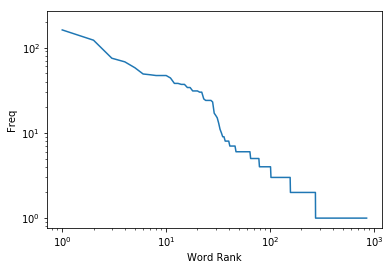

In [24]:
word_counts = sorted(list(Counter(words).values()), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Example 13. Generating histograms of words, screen names, and hashtags

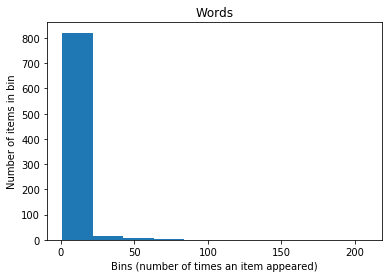

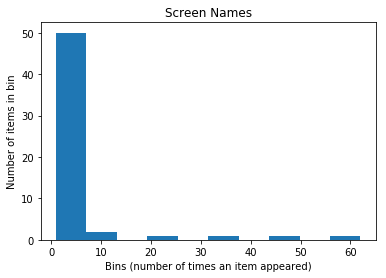

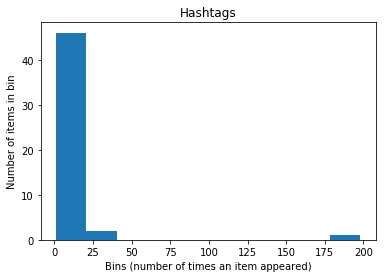

In [25]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Example 14. Generating a histogram of retweet counts

[1, 12, 541, 236, 1339, 1, 1568, 2320, 173, 62, 145, 1339, 1569, 1569, 4, 1339, 1569, 46, 782, 1339, 1339, 1339, 1569, 2113, 1339, 406, 1339, 1569, 1339, 1, 12, 1339, 38, 1339, 12, 2007, 1339, 38, 1339, 1569, 1569, 1339, 62, 151, 179, 782, 1339, 405, 1339, 35, 3, 1385, 1569, 151, 2, 1569, 1339, 1339, 1, 145, 1, 5, 1339, 38, 1574, 5, 1343, 1574, 1574, 1574, 2, 2795, 38, 1574, 14, 130, 130, 130, 1574, 1343, 1574, 147, 1574, 1343, 1, 1574, 1343, 178, 693, 1574, 2320, 1574, 1574, 148, 1343, 2007, 1343, 85, 1343, 178, 782, 1343, 48, 1343, 38, 1574, 17, 2, 1343, 14, 12, 2007, 1, 1343, 782, 38, 1574, 1574, 7, 12, 3]


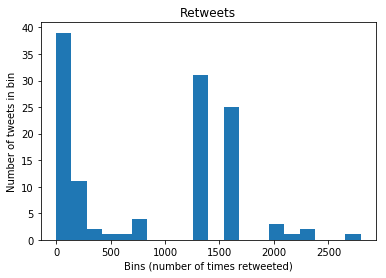

In [26]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts,bins=20)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print(counts)

Note: This histogram gives you an idea of how many times tweets are retweeted with the x-axis defining partitions for tweets that have been retweeted some number of times and the y-axis telling you how many tweets fell into each bin. For example, a y-axis value of 5 for the "15-20 bin" on the x-axis means that there were 5 tweets that were retweeted between 15 and 20 times.

Here's another variation that transforms the data using the (automatically imported from numpy) log function in order to improve the resolution of the plot.

In [27]:
import numpy as np

[ 0.          2.48490665  6.29341928  5.46383181  7.19967835  0.          7.3575562
  7.74932246  5.15329159  4.12713439  4.97673374  7.19967835  7.35819375
  7.35819375  1.38629436  7.19967835  7.35819375  3.8286414   6.66185474
  7.19967835  7.19967835  7.19967835  7.35819375  7.65586402  7.19967835
  6.00635316  7.19967835  7.35819375  7.19967835  0.          2.48490665
  7.19967835  3.63758616  7.19967835  2.48490665  7.60439635  7.19967835
  3.63758616  7.19967835  7.35819375  7.35819375  7.19967835  4.12713439
  5.01727984  5.18738581  6.66185474  7.19967835  6.00388707  7.19967835
  3.55534806  1.09861229  7.23345542  7.35819375  5.01727984  0.69314718
  7.35819375  7.19967835  7.19967835  0.          4.97673374  0.
  1.60943791  7.19967835  3.63758616  7.36137543  1.60943791  7.2026612
  7.36137543  7.36137543  7.36137543  0.69314718  7.93558739  3.63758616
  7.36137543  2.63905733  4.86753445  4.86753445  4.86753445  7.36137543
  7.2026612   7.36137543  4.99043259  7.36137543 

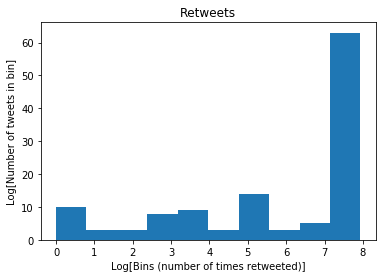

In [28]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well. Try it back on
# Example 13 and see if it helps.

plt.hist(np.log(counts))
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')

print(np.log(counts))